# 환경 세팅

## 한글폰트 설치 (런타임 재시작 필요)

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,379 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

## lightgbm 버전 다운그레이드 (런타임 재시작 필요)
- lightgbm 3.3.2 버전

In [ ]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.2 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.0.0
    Uninstalling lightgbm-4.0.0:
      Successfully uninstalled lightgbm-4.0.0


## 설치 확인

In [ ]:
import lightgbm
lightgbm.__version__

'3.3.2'

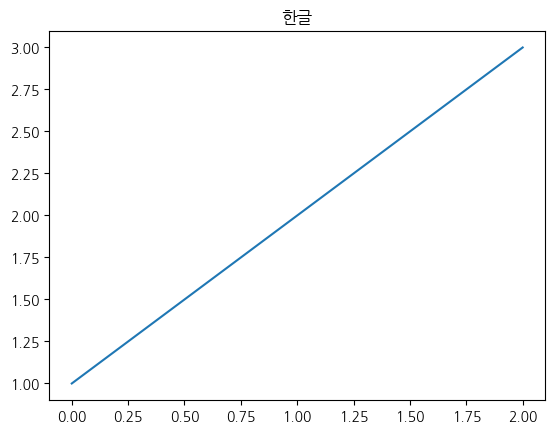

In [ ]:
import matplotlib.pyplot as plt
plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

## 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 데이터 불러오기

In [ ]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/세미프로젝트/data/'
data = pd.read_csv(DATA_PATH + '머신러닝.csv')

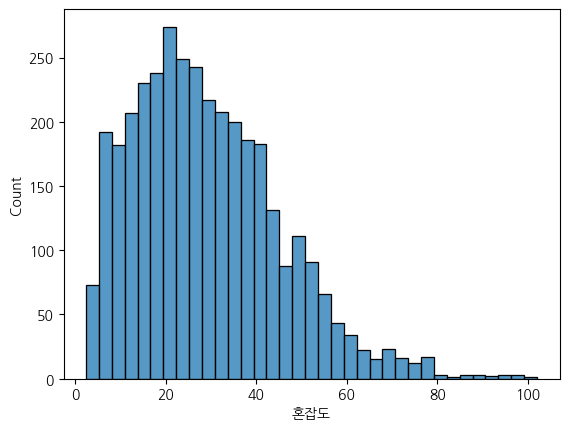

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.histplot(data=data, x='혼잡도')
plt.show()

# 머신러닝 코드

In [ ]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
    model_name = model.__class__.__name__
    grid_cv = GridSearchCV(model, param_grid=params,
                           scoring='neg_mean_squared_error', cv=5)

    grid_cv.fit(X_features, y_target)
    best_rmse = np.sqrt(-1* grid_cv.best_score_)

    print(f'{model_name} GridSearchCV 최적 평균 RMSE: {np.round(best_rmse, 4)}, 최적 alpha:{grid_cv.best_params_}')

    return grid_cv.best_estimator_

## 다중선형회귀 (sklearn.linear_model.LinearRegression)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib


# 독립/ 종속 변수 나누기
X = data[['시간대', '요일', '방향', '연도', '역명']]
y = data['혼잡도']

# 훈련+검증/ 테스트 데이터 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 / 검증 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.375, random_state=42)

# 범주형 열에 OneHotEncoder를 적용
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['시간대', '요일', '방향', '역명'])
    ],
    remainder='passthrough'  # 나머지 열은 그대로 유지
)

# Pipeline을 정의합니다.
pipeline = Pipeline([
    ('preprocessor', column_transformer),  # ColumnTransformer를 적용하여 원핫 인코딩 수행
    ('Lin_reg', LinearRegression())  # LinearRegression 모델 사용
])

# Pipeline을 사용하여 모델을 학습합니다.
pipeline.fit(X_train, y_train)

# 학습된 모델을 파일로 저장합니다.
joblib.dump(pipeline, 'skl_lin.pkl')

# 검증 데이터를 사용하여 모델의 성능을 평가합니다.
y_val_pred = pipeline.predict(X_val)

# 성능 지표 계산
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

# 결과를 출력합니다.
print("Validation 성능 지표:")
print("R-squared (R2):", r2_val)
print("Mean Absolute Error (MAE):", mae_val)
print("Root Mean Squared Error (RMSE):", rmse_val)

# 테스트 데이터를 사용하여 모델의 성능을 평가합니다.
y_test_pred = pipeline.predict(X_test)

# 성능 지표 계산
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# 결과를 출력합니다.
print("\nTest 성능 지표:")
print("R-squared (R2):", r2_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

Validation 성능 지표:
R-squared (R2): 0.7034543476706189
Mean Absolute Error (MAE): 6.504502655705216
Root Mean Squared Error (RMSE): 8.774969459919458

Test 성능 지표:
R-squared (R2): 0.6766464338138944
Mean Absolute Error (MAE): 6.698048927827919
Root Mean Squared Error (RMSE): 9.398052228121921


## 다중선형회귀 (lightgbm.LGBMRegressor)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import joblib

# 독립/ 종속 변수 나누기
X = data[['시간대', '요일', '방향', '연도', '역명']]
y = data['혼잡도']

# 훈련+검증/ 테스트 데이터 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 / 검증 데이터 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.375, random_state=42)

# 범주형 열에 OneHotEncoder를 적용
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['시간대', '요일', '방향', '역명'])
    ],
    remainder='passthrough'  # 나머지 열은 그대로 유지
)

# LightGBM 모델을 정의합니다.
lgb_reg = lgb.LGBMRegressor(random_state=42)


# Pipeline 정의
pipeline = Pipeline([
    ('preprocessor', column_transformer),  # ColumnTransformer를 적용
    ('LGB_reg', lgb_reg)  # LGBMRegressor 모델 사용
])

# Pipeline을 사용하여 모델을 학습합니다.
pipeline.fit(X_train, y_train)

# 학습된 모델을 파일로 저장합니다.
joblib.dump(pipeline, 'lgb_reg.pkl')

# 검증 데이터를 사용하여 모델의 성능을 평가합니다.
y_val_pred = pipeline.predict(X_val)

# 성능 지표 계산
r2_val = r2_score(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = mean_squared_error(y_val, y_val_pred, squared=False)

# 결과를 출력합니다.
print("Validation 성능 지표:")
print("R-squared (R2):", r2_val)
print("Mean Absolute Error (MAE):", mae_val)
print("Root Mean Squared Error (RMSE):", rmse_val)

# 테스트 데이터를 사용하여 모델의 성능을 평가합니다.
y_test_pred = pipeline.predict(X_test)

# 성능 지표 계산
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# 결과를 출력합니다.
print("\nTest 성능 지표:")
print("R-squared (R2):", r2_test)
print("Mean Absolute Error (MAE):", mae_test)
print("Root Mean Squared Error (RMSE):", rmse_test)

Validation 성능 지표:
R-squared (R2): 0.9220175180512543
Mean Absolute Error (MAE): 3.0396926100012926
Root Mean Squared Error (RMSE): 4.4998533432487475

Test 성능 지표:
R-squared (R2): 0.8967324625188972
Mean Absolute Error (MAE): 3.3906368157351303
Root Mean Squared Error (RMSE): 5.311056691064306


# 주요 학습 변수

## sklearn.linear_model.LinearRegression

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


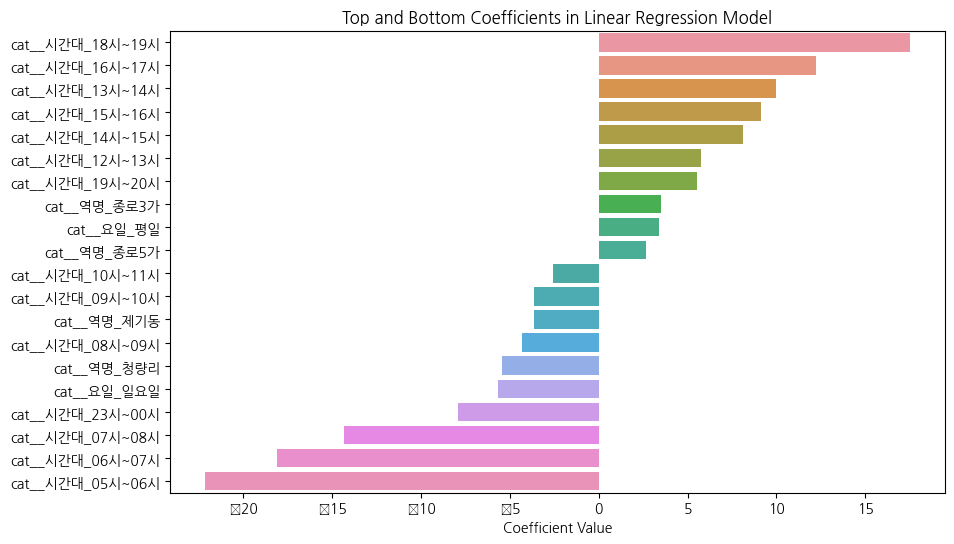

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 저장된 모델 파일을 불러옵니다.
model = joblib.load('skl_lin.pkl')

# 모델의 계수(coef)를 가져옵니다.
coefficients = model.named_steps['Lin_reg'].coef_

# 독립 변수 X의 컬럼 이름을 가져옵니다.
columns = model.named_steps['preprocessor'].get_feature_names_out(input_features=X.columns)

# 계수와 컬럼 이름을 DataFrame으로 만듭니다.
coef_df = pd.DataFrame({'Coefficient': coefficients}, index=columns)

# 계수를 내림차순으로 정렬합니다.
coef_sorted = coef_df.sort_values(by='Coefficient', ascending=False)

# 시각화를 위해 상위 10개와 하위 10개 계수만 선택합니다.
top_bottom_coef = pd.concat([coef_sorted.head(10), coef_sorted.tail(10)])

# 시각화 설정
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y=top_bottom_coef.index, data=top_bottom_coef)
plt.xlabel('Coefficient Value')
plt.title('Top and Bottom Coefficients in Linear Regression Model')
plt.show()

## lightgbm.LGBMRegressor

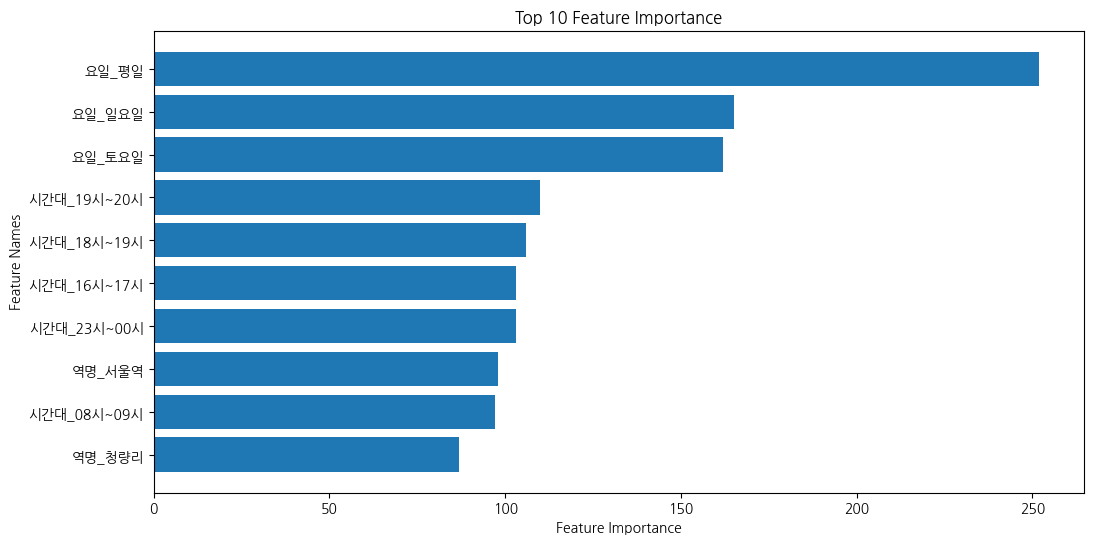

In [43]:
import lightgbm as lgb
import joblib
import matplotlib.pyplot as plt

# .pkl 파일로부터 파이프라인 객체를 로드합니다.
loaded_pipeline = joblib.load('lgb_reg.pkl')

# 파이프라인에서 모델을 추출합니다.
loaded_model = loaded_pipeline.named_steps['LGB_reg']

# 모델에서 feature importance를 가져옵니다.
feature_importance = loaded_model.feature_importances_

# OneHot 인코딩을 사용한 경우, 칼럼명을 추출합니다.
column_transformer = loaded_pipeline.named_steps['preprocessor']
onehot_columns = list(column_transformer.named_transformers_['cat'].get_feature_names_out(input_features=['시간대', '요일', '방향', '역명']))
all_columns = onehot_columns  # OneHot 인코딩 칼럼명

# 특성 중요도와 칼럼명을 연결합니다.
feature_importance_with_names = list(zip(all_columns, feature_importance))

# 특성 중요도를 중요도 값으로 정렬합니다.
feature_importance_with_names.sort(key=lambda x: x[1], reverse=True)

# 상위 N개의 중요한 특성만 선택
top_n = 10  # 상위 10개 특성을 표시하도록 설정
top_features = feature_importance_with_names[:top_n]

# 중요한 특성과 중요도를 시각화합니다.
top_feature_names, top_feature_importance = zip(*top_features)
plt.figure(figsize=(12, 6))
plt.barh(top_feature_names, top_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Top {} Feature Importance'.format(top_n))
plt.gca().invert_yaxis()  # 중요도가 높은 순서대로 표시하기 위해 y-축 뒤집기
plt.show()

# 예측

## Scikit-learn LinearRegression

In [ ]:
import joblib
import numpy as np

# 저장된 모델 파일을 불러옵니다.
model = joblib.load('skl_lin.pkl')

# 예측할 데이터 예시
new_data = pd.DataFrame({'시간대': ['18시~19시'], '요일': ['평일'], '방향': ['상선'], '연도': [2023], '역명': ['서울역']})

# 예측을 수행합니다.
predicted_congestion = model.predict(new_data)

# 예측 결과를 출력합니다.
print("예측 혼잡도:", predicted_congestion)

예측 혼잡도: [40.39820095]


## LGBMRegressor

In [ ]:
import joblib
import numpy as np

# 저장된 모델 파일을 불러옵니다.
model = joblib.load('lgb_reg.pkl')

# 예측할 데이터 예시
new_data = pd.DataFrame({'시간대': ['18시~19시'], '요일': ['평일'], '방향': ['상선'], '연도': [2023], '역명': ['서울역']})

# 예측을 수행합니다.
predicted_congestion = model.predict(new_data)

# 예측 결과를 출력합니다.
print("예측 혼잡도:", predicted_congestion)

예측 혼잡도: [48.27539066]
